In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='dark')

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
train.shape

(8693, 14)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
train.describe(include='all')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,7984_03,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Carry Contrevins,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


In [8]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [9]:
train.isnull().mean().mul(100) # Shows null value percentage(%) from each column

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

In [10]:
train[train.isnull().any(axis=1)]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False
16,0014_01,Mars,False,F/3/P,55 Cancri e,27.0,False,1286.0,122.0,NaN,0.0,0.0,Flats Eccle,False
23,0020_03,Earth,True,E/0/S,55 Cancri e,29.0,False,0.0,0.0,NaN,0.0,0.0,Mollen Mcfaddennon,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8667,9250_01,Europa,False,E/597/P,TRAPPIST-1e,29.0,False,0.0,2972.0,NaN,28.0,188.0,Chain Reedectied,True
8674,9257_01,NaN,False,F/1892/P,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,False
8675,9259_01,Earth,NaN,F/1893/P,TRAPPIST-1e,44.0,False,1030.0,1015.0,0.0,11.0,NaN,Annah Gilleyons,True
8684,9274_01,NaN,True,G/1508/P,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Chelsa Bullisey,True


In [11]:
(2087/8693)*100 # Shows data frame null values percentage(%) with at least one null value

24.007822385827676

In [12]:
train.duplicated().sum()

0

## Data Processing

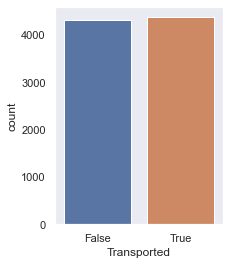

True     4378
False    4315
Name: Transported, dtype: int64

In [13]:
plt.figure(figsize=(3, 4))

sns.countplot(x=train['Transported'])

plt.show()

train['Transported'].value_counts()

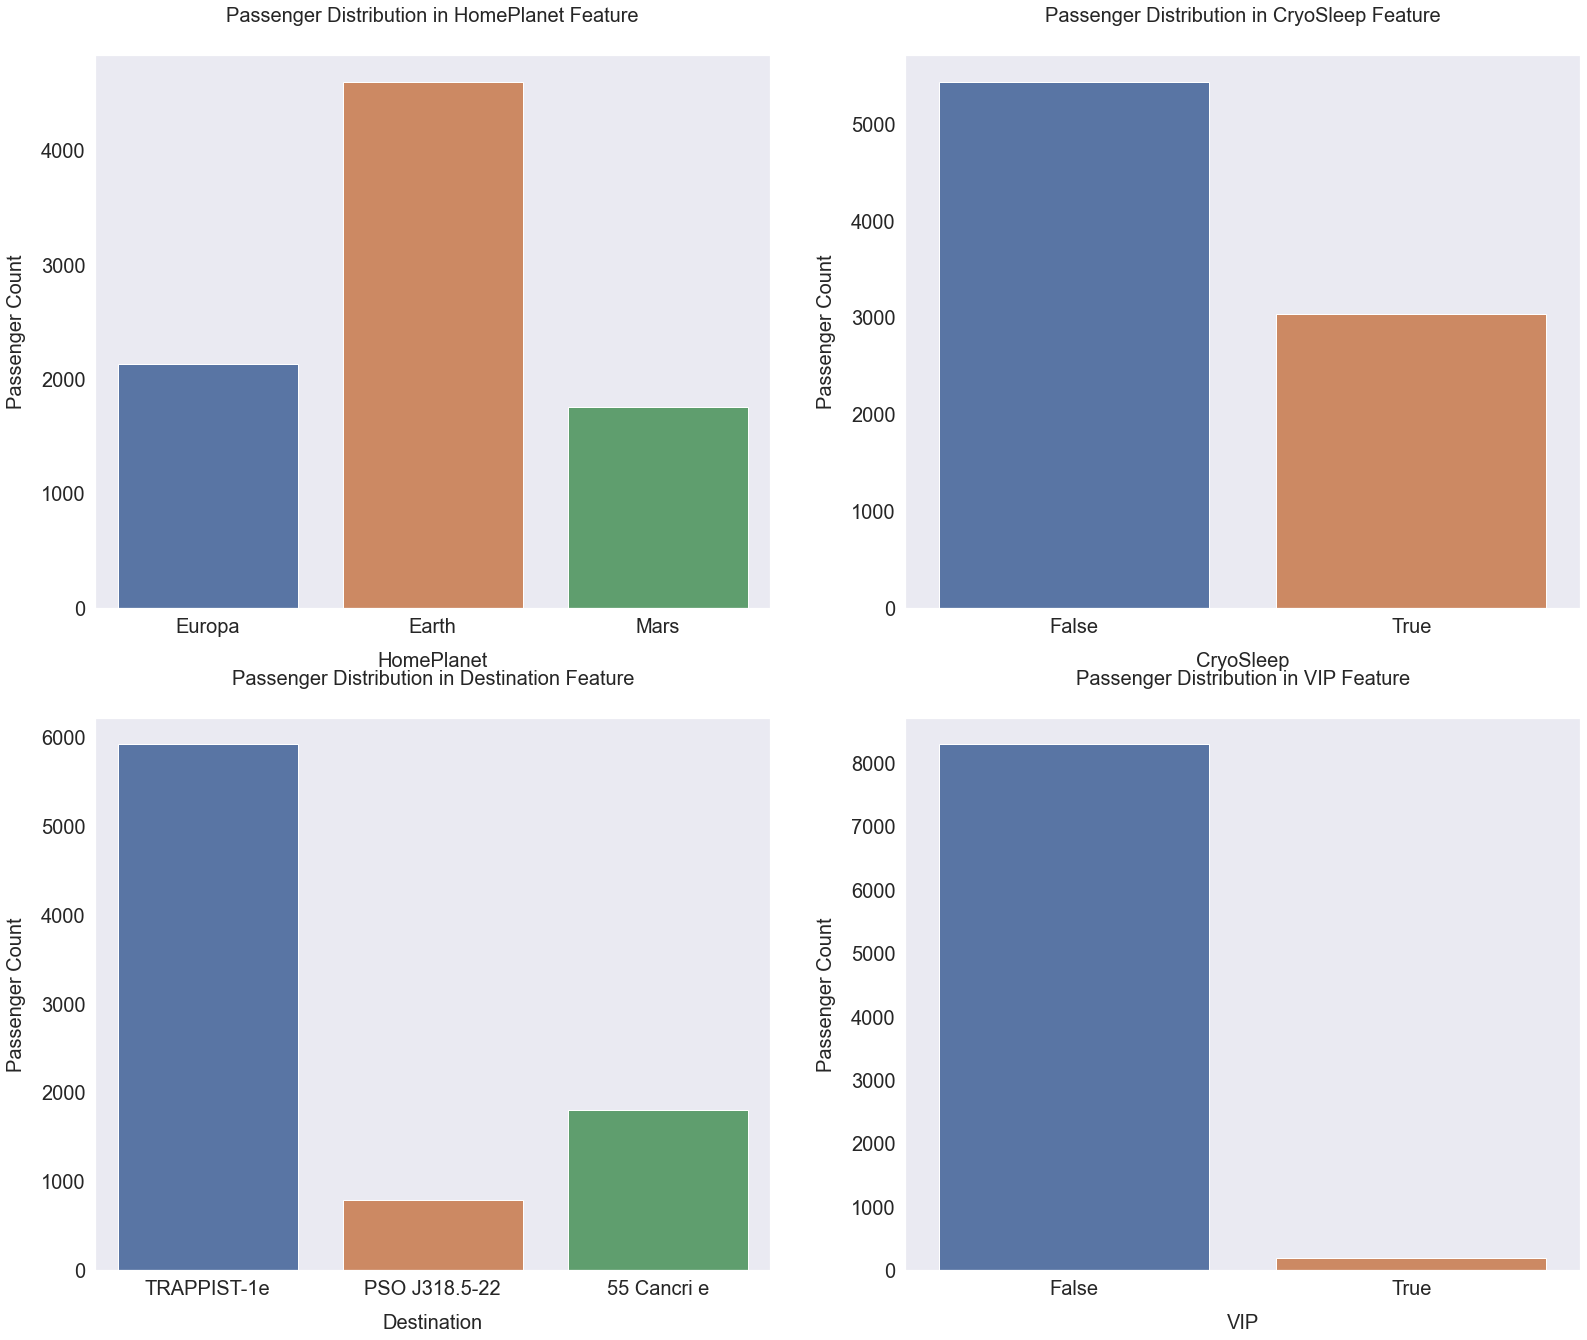

In [14]:
cat_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(15, 15))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(cat_features, 1):    
    plt.subplot(2, 2, i)
    sns.countplot(x=feature, data=train)
    
    plt.xlabel('{}'.format(feature), size=20, labelpad=15)
    plt.ylabel('Passenger Count', size=20, labelpad=15)    
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    
    plt.title('Passenger Distribution in {} Feature'.format(feature), size=20, y=1.05)

plt.show()

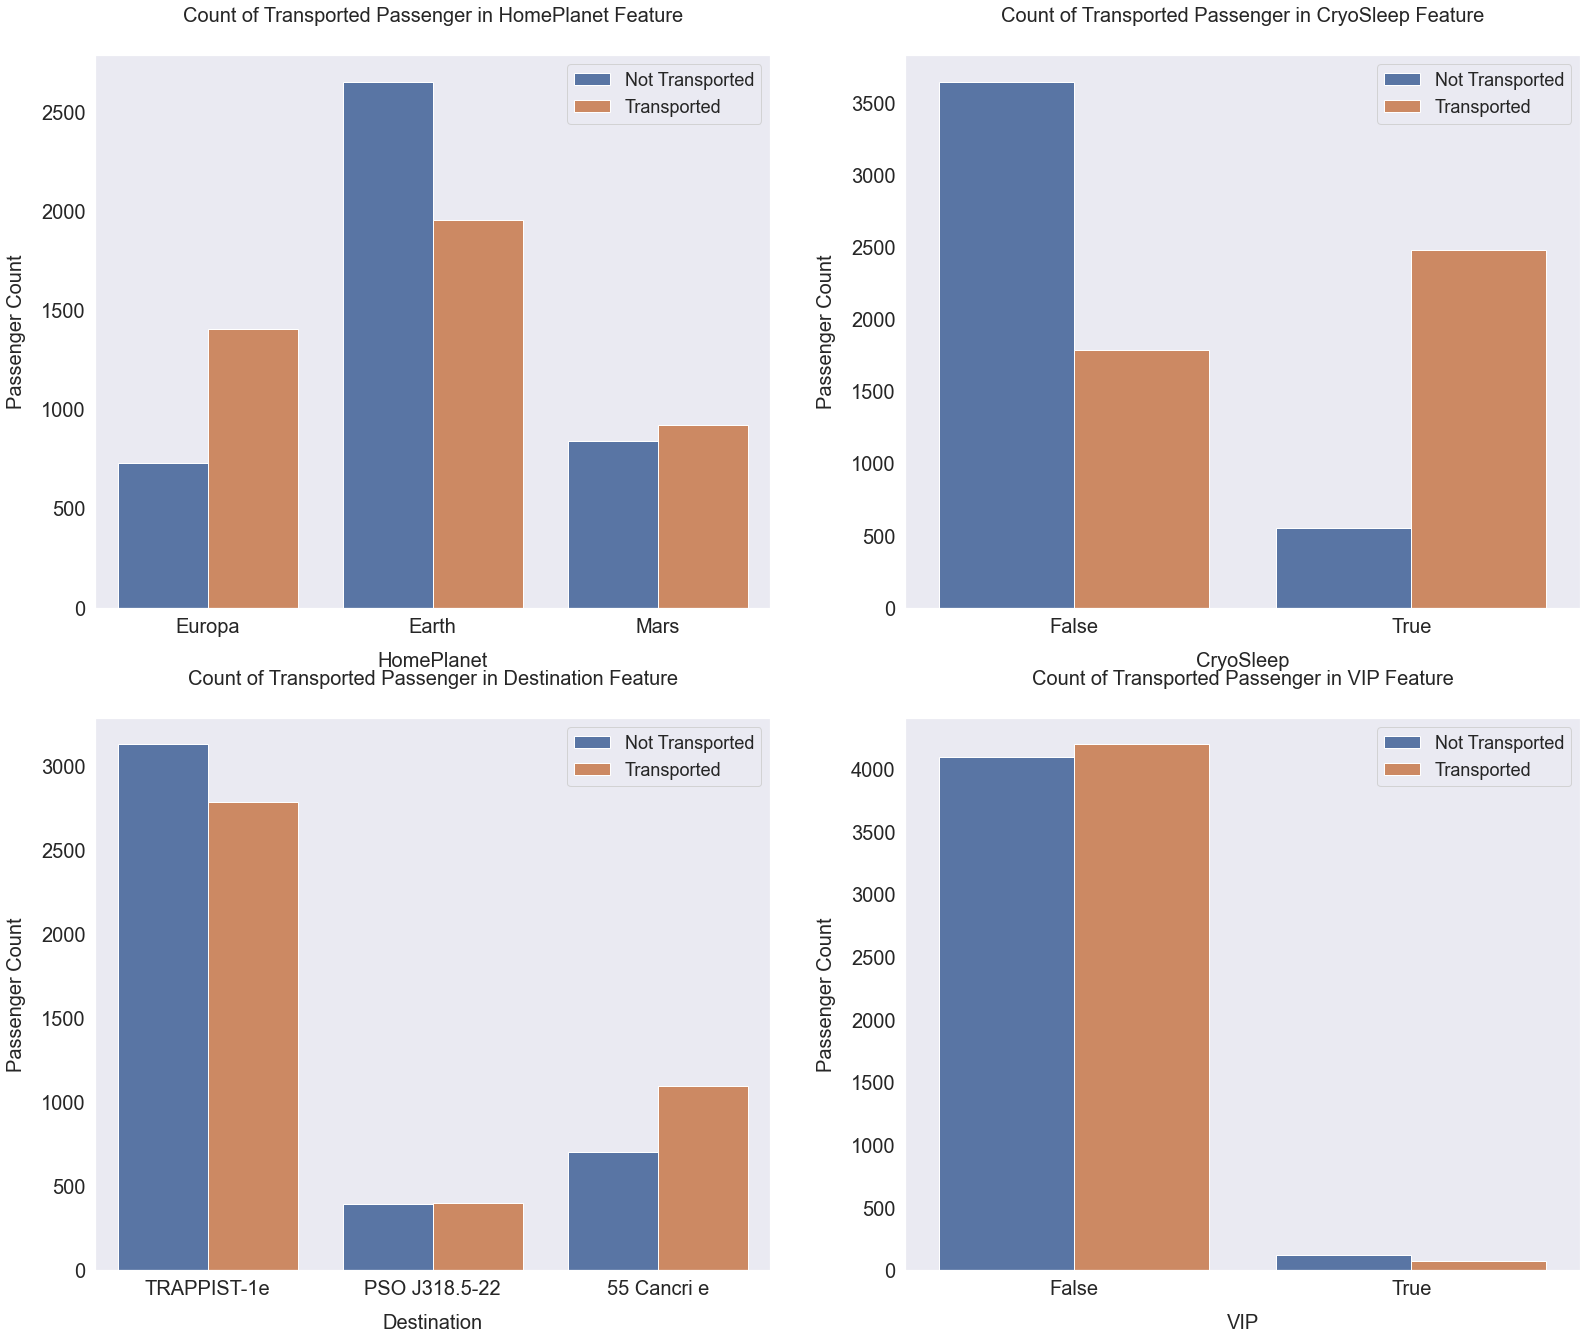

In [15]:
cat_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(15, 15))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(cat_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=feature, hue='Transported', data=train)
    
    plt.xlabel('{}'.format(feature), size=20, labelpad=15)
    plt.ylabel('Passenger Count', size=20, labelpad=15)    
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    
    plt.legend(['Not Transported', 'Transported'], loc='upper right', prop={'size': 18})
    plt.title('Count of Transported Passenger in {} Feature'.format(feature), size=20, y=1.05)

plt.show()

`Cabin`

In [16]:
train[['Deck', 'Number', 'Side']] = train['Cabin'].str.split('/', expand=True)

In [17]:
train[['Deck', 'Number', 'Side']].nunique()

Deck         8
Number    1817
Side         2
dtype: int64

In [18]:
print("Deck column unique values: ", train['Deck'].unique())
print("Deck column values counts: \n", train['Deck'].value_counts(dropna=False))

Deck column unique values:  ['B' 'F' 'A' 'G' nan 'E' 'D' 'C' 'T']
Deck column values counts: 
 F      2794
G      2559
E       876
B       779
C       747
D       478
A       256
NaN     199
T         5
Name: Deck, dtype: int64


In [19]:
print("Side column unique values: ", train['Side'].unique())
print("Side column values counts: \n", train['Side'].value_counts(dropna=False))

Side column unique values:  ['P' 'S' nan]
Side column values counts: 
 S      4288
P      4206
NaN     199
Name: Side, dtype: int64


`Age`

In [20]:
train['Age'].fillna(train['Age'].median(), inplace=True)

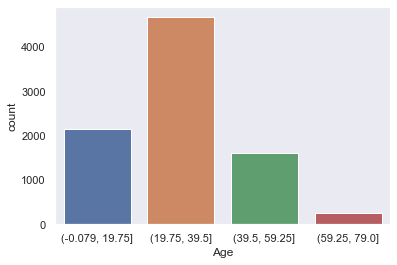

In [21]:
age_binned = pd.cut(train['Age'], 4)

sns.countplot(x=age_binned)
plt.show()

In [22]:
train['Age_binned'] = pd.cut(train['Age'], 4, labels=['Youth', 'Middle', 'Adult', 'Elder'])

`Luxury Amenities`

In [23]:
train['RoomService'].fillna(0, inplace=True)
train['FoodCourt'].fillna(0, inplace=True)
train['ShoppingMall'].fillna(0, inplace=True)
train['Spa'].fillna(0, inplace=True)
train['VRDeck'].fillna(0, inplace=True)

In [24]:
train['Spend'] = train['RoomService'] + train['FoodCourt'] + train['ShoppingMall'] + train['Spa'] + train['VRDeck']

In [25]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Number,Side,Age_binned,Spend
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P,Middle,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S,Middle,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S,Adult,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S,Middle,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S,Youth,1091.0


In [26]:
train['CryoSleep'].isnull().sum()

217

In [27]:
train[(train['CryoSleep'].isnull())].head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Number,Side,Age_binned,Spend
92,0099_02,Earth,NaN,G/12/P,TRAPPIST-1e,2.0,False,0.0,0.0,0.0,0.0,0.0,Thewis Connelson,True,G,12,P,Youth,0.0
98,0105_01,Earth,NaN,F/21/P,TRAPPIST-1e,27.0,False,0.0,0.0,570.0,2.0,131.0,Carry Cleachrand,False,F,21,P,Middle,703.0
104,0110_02,Europa,NaN,B/5/P,TRAPPIST-1e,40.0,False,0.0,331.0,0.0,0.0,1687.0,Aldeba Bootious,False,B,5,P,Adult,2018.0
111,0115_01,Mars,NaN,F/24/P,TRAPPIST-1e,26.0,False,0.0,0.0,0.0,0.0,0.0,Rohs Pead,True,F,24,P,Middle,0.0
152,0173_01,Earth,NaN,E/11/S,TRAPPIST-1e,58.0,False,0.0,985.0,0.0,5.0,0.0,Hilip Grifford,True,E,11,S,Adult,990.0


In [28]:
def myfunc(cryosleep, spend):
    if pd.isnull(cryosleep) and spend == 0:
        cryosleep = True
    elif pd.isnull(cryosleep) and spend > 0:
        cryosleep = False
    else:
        cryosleep = cryosleep
    return cryosleep

In [29]:
train['CryoSleep_filled'] = train.apply(lambda x: myfunc(x['CryoSleep'], x['Spend']), axis=1)

In [30]:
train[(train['CryoSleep'].isnull())].head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Number,Side,Age_binned,Spend,CryoSleep_filled
92,0099_02,Earth,NaN,G/12/P,TRAPPIST-1e,2.0,False,0.0,0.0,0.0,0.0,0.0,Thewis Connelson,True,G,12,P,Youth,0.0,True
98,0105_01,Earth,NaN,F/21/P,TRAPPIST-1e,27.0,False,0.0,0.0,570.0,2.0,131.0,Carry Cleachrand,False,F,21,P,Middle,703.0,False
104,0110_02,Europa,NaN,B/5/P,TRAPPIST-1e,40.0,False,0.0,331.0,0.0,0.0,1687.0,Aldeba Bootious,False,B,5,P,Adult,2018.0,False
111,0115_01,Mars,NaN,F/24/P,TRAPPIST-1e,26.0,False,0.0,0.0,0.0,0.0,0.0,Rohs Pead,True,F,24,P,Middle,0.0,True
152,0173_01,Earth,NaN,E/11/S,TRAPPIST-1e,58.0,False,0.0,985.0,0.0,5.0,0.0,Hilip Grifford,True,E,11,S,Adult,990.0,False


In [31]:
train['CryoSleep_filled'].isnull().sum()

0

`Dealing with missing values`

In [32]:
train['HomePlanet'].fillna(train['HomePlanet'].mode()[0], inplace=True)
train['Destination'].fillna(train['Destination'].mode()[0], inplace=True)
train['VIP'].fillna(train['VIP'].mode()[0], inplace=True)
train['Deck'].fillna(train['Deck'].mode()[0], inplace=True)
train['Side'].fillna(train['Side'].mode()[0], inplace=True)

In [33]:
train.isnull().sum()

PassengerId           0
HomePlanet            0
CryoSleep           217
Cabin               199
Destination           0
Age                   0
VIP                   0
RoomService           0
FoodCourt             0
ShoppingMall          0
Spa                   0
VRDeck                0
Name                200
Transported           0
Deck                  0
Number              199
Side                  0
Age_binned            0
Spend                 0
CryoSleep_filled      0
dtype: int64

In [34]:
train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'Deck', 'Number', 'Side', 'Age_binned', 'Spend',
       'CryoSleep_filled'],
      dtype='object')

In [35]:
train.drop(['PassengerId', 'CryoSleep', 'Cabin', 'Name', 'Number'], axis=1, inplace=True)

In [36]:
train = pd.get_dummies(train)

In [37]:
train.head()

,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Spend,CryoSleep_filled,...,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S,Age_binned_Youth,Age_binned_Middle,Age_binned_Adult,Age_binned_Elder
0,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0.0,False,...,0,0,0,0,1,0,0,1,0,0
1,24.0,False,109.0,9.0,25.0,549.0,44.0,True,736.0,False,...,0,1,0,0,0,1,0,1,0,0
2,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,10383.0,False,...,0,0,0,0,0,1,0,0,1,0
3,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,5176.0,False,...,0,0,0,0,0,1,0,1,0,0
4,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1091.0,False,...,0,1,0,0,0,1,1,0,0,0


## XGBoost

In [38]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [39]:
X = train.drop('Transported', axis=1)
y = train['Transported']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [41]:
# Initialize XGB
xgb = XGBClassifier(n_estimators=200, max_depth=4, random_state=1)

# Fit XGB to traning set
xgb.fit(X_train, y_train)

# Predict labels of test set, y_pred
y_pred = xgb.predict(X_test)

score = accuracy_score(y_pred, y_test)

print('Score: ' + str(score*100))

Score: 80.81876724931003


In [42]:
# Initialize XGB
xgb = XGBClassifier(booster='gbtree', max_depth=4, learning_rate=0.1, n_estimators=200, random_state=2, n_jobs=-1)

# Fit XGB to traning set
xgb.fit(X_train, y_train)

# Predict labels of test set, y_pred
y_pred = xgb.predict(X_test)

score = accuracy_score(y_pred, y_test)

print('Score: ' + str(score*100))

Score: 81.87672493100277


In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
confusion_matrix(y_test, y_pred)

array([[835, 223],
       [171, 945]], dtype=int64)